In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Exploration

In [2]:
df = pd.read_csv("../DataSets/LP_Train.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_columns:
    print(f"--- Distribution of {col} ---")
    value_counts = df[col].value_counts() 
    percentages = df[col].value_counts(normalize=True) * 100 
    print(pd.DataFrame({"Frequency": value_counts, "Percentage": percentages}).to_string())
    print("\n")

--- Distribution of Gender ---
        Frequency  Percentage
Gender                       
Male          489   81.364393
Female        112   18.635607


--- Distribution of Married ---
         Frequency  Percentage
Married                       
Yes            398   65.139116
No             213   34.860884


--- Distribution of Dependents ---
            Frequency  Percentage
Dependents                       
0                 345   57.595993
1                 102   17.028381
2                 101   16.861436
3+                 51    8.514190


--- Distribution of Education ---
              Frequency  Percentage
Education                          
Graduate            480   78.175896
Not Graduate        134   21.824104


--- Distribution of Self_Employed ---
               Frequency  Percentage
Self_Employed                       
No                   500   85.910653
Yes                   82   14.089347


--- Distribution of Property_Area ---
               Frequency  Percentage
Prope

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling Missing Data

In [8]:
df['Gender'].fillna('Unknown',inplace=True)

In [9]:
df['Married'].fillna('Unknown',inplace=True)

In [10]:
df['Self_Employed'].fillna('Unknown',inplace=True)

In [11]:
df['Dependents'].fillna('0',inplace=True)

In [12]:
df['LoanAmount'].fillna('0',inplace=True)
df['LoanAmount']=df['LoanAmount'].astype('int64')

In [13]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df['Loan_Amount_Term'].fillna('0',inplace=True)

In [15]:
df['Credit_History'].fillna('0',inplace=True)

In [16]:
df.Dependents = df.Dependents.replace("[+]","",regex=True)

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
df.Loan_Status = df.Loan_Status.replace({"Y":1,"N":0})

# Demographic Analysis

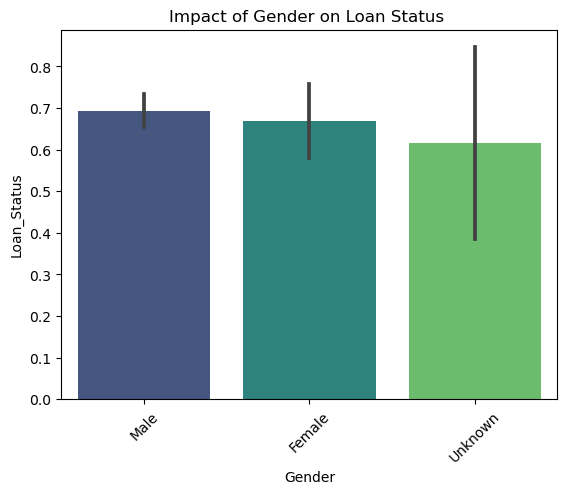

In [19]:
sb.barplot(x=df.Gender,y=df.Loan_Status,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Gender")       
plt.ylabel("Loan_Status")        
plt.title("Impact of Gender on Loan Status ")
plt.show()

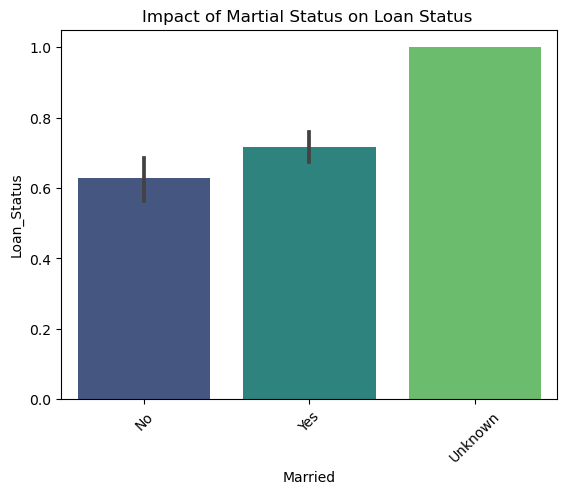

In [38]:
sb.barplot(x=df.Married,y=df.Loan_Status,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Married")       
plt.ylabel("Loan_Status")        
plt.title("Impact of Martial Status on Loan Status ")
plt.show()

In [22]:
df.groupby(['Dependents','Loan_Status']).size().unstack()

Loan_Status,0,1
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


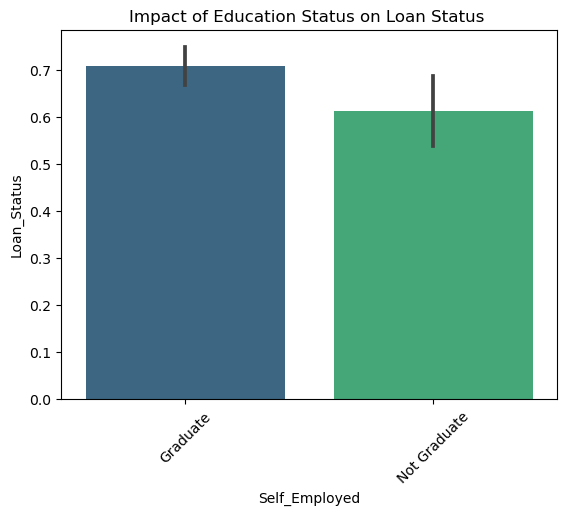

In [39]:
sb.barplot(x=df.Education,y=df.Loan_Status,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Self_Employed")       
plt.ylabel("Loan_Status")        
plt.title("Impact of Education Status on Loan Status ")
plt.show()

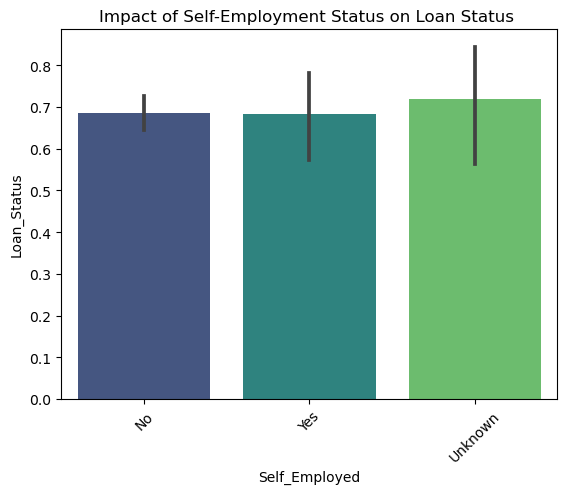

In [25]:
sb.barplot(x=df.Self_Employed,y=df.Loan_Status,palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Self_Employed")       
plt.ylabel("Loan_Status")        
plt.title("Impact of Self-Employment Status on Loan Status ")
plt.show()

# Income and Loan Amount Analysis

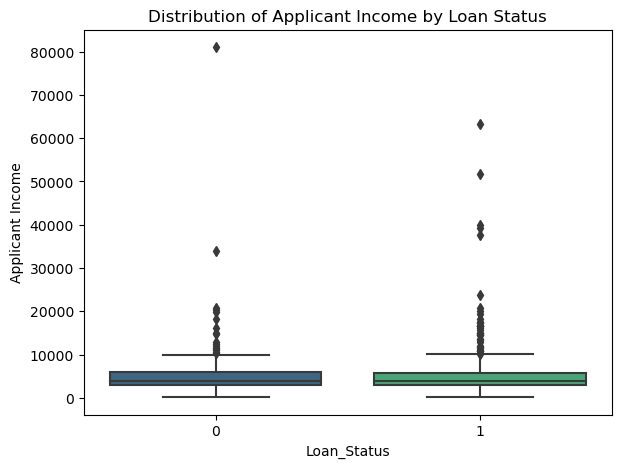

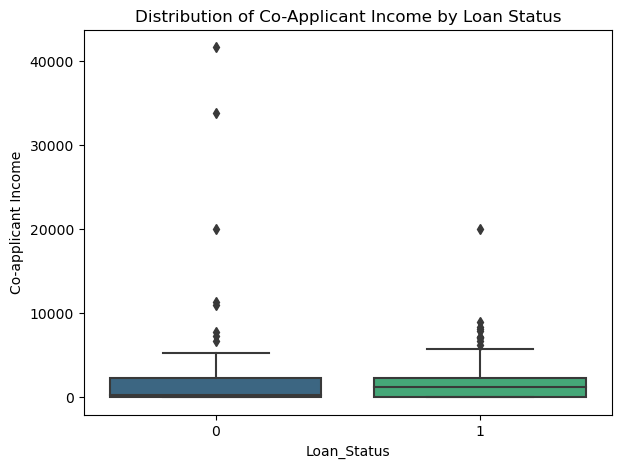

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.boxplot(x='Loan_Status',y='ApplicantIncome',data=df , palette='viridis')
plt.xlabel("Loan_Status")       
plt.ylabel("Applicant Income")        
plt.title("Distribution of Applicant Income by Loan Status")


plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sb.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df , palette='viridis')
plt.xlabel("Loan_Status")       
plt.ylabel("Co-applicant Income")        
plt.title("Distribution of Co-Applicant Income by Loan Status")
plt.show()



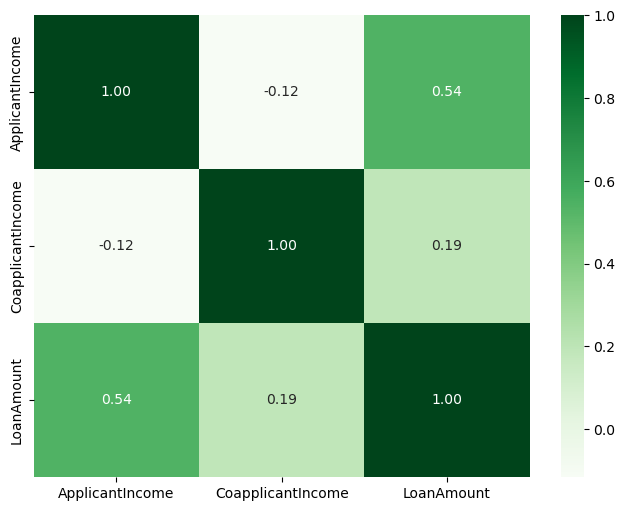

In [27]:
correlation_matrix = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.show()

In [28]:
df.groupby('Gender')['LoanAmount'].mean()

Gender
Female     123.303571
Male       143.466258
Unknown    208.538462
Name: LoanAmount, dtype: float64

In [29]:
df.groupby('Married')['LoanAmount'].mean()

Married
No         124.647887
Unknown    106.000000
Yes        150.271357
Name: LoanAmount, dtype: float64

In [30]:
df.groupby('Education')['LoanAmount'].mean()

Education
Graduate        149.245833
Not Graduate    112.223881
Name: LoanAmount, dtype: float64

# Credit History and Loan Term Analysis

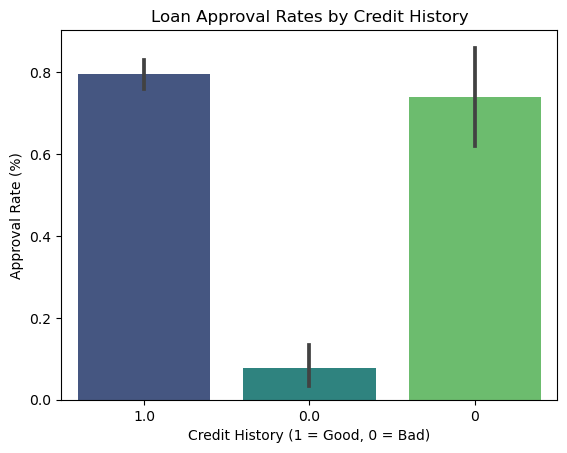

In [31]:
sb.barplot(x='Credit_History', y='Loan_Status', data=df, palette='viridis')
plt.title("Loan Approval Rates by Credit History")
plt.xlabel("Credit History (1 = Good, 0 = Bad)")
plt.ylabel("Approval Rate (%)")
plt.show()

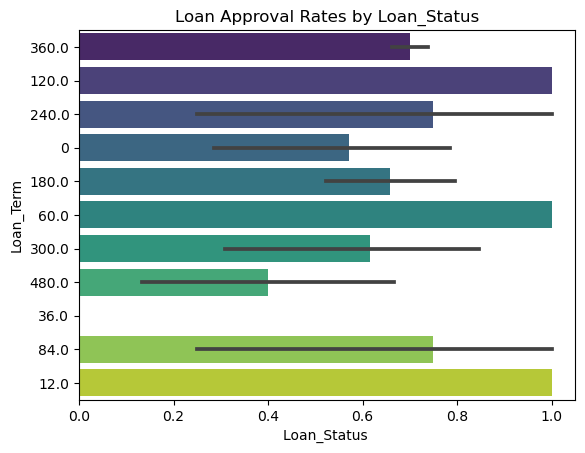

In [32]:
sb.barplot(x='Loan_Status', y='Loan_Amount_Term',data=df,palette='viridis')
plt.title("Loan Approval Rates by Loan_Status")
plt.xlabel("Loan_Status ")
plt.ylabel("Loan_Term")
plt.show()

In [33]:
pivot_table = pd.pivot_table(
    df,
    values='Loan_Status',
    index='Credit_History',
    columns='Loan_Amount_Term',
    aggfunc=lambda x: (x == 'Y').mean()
)
pivot_table


Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0,0
Credit_History,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN


# Property Area and Loan Approval

In [34]:
e=df.groupby('Property_Area')['Loan_Status'].mean()

In [35]:
e

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64

Text(0.5, 1.0, 'Loan Status Across Different Property Areas')

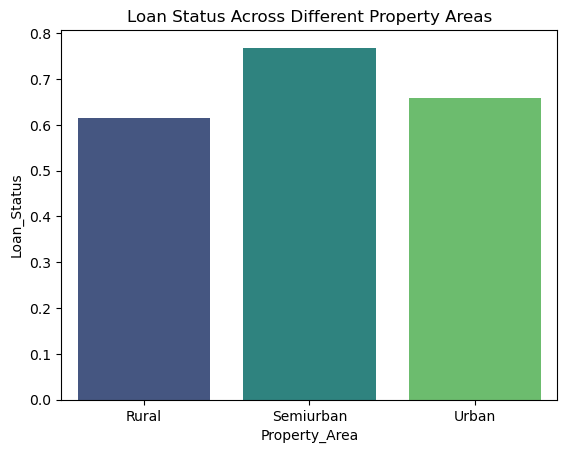

In [36]:
e=e.reset_index()
sb.barplot(x=e.Property_Area,y=e.Loan_Status,palette='viridis')
plt.xlabel("Property_Area")       
plt.ylabel("Loan_Status")        
plt.title("Loan Status Across Different Property Areas")
    